<div style="width: 100%; display: flex; justify-content: space-between; align-items: center;">
    <h1 style="color: black;">
        Workshop:<br>
        <b>Datenauswertung mit Python<br>und Jupyter Notebooks</b>
    </h1>
    <div style="width: 7rem; padding-right: 2rem; margin: .5rem;">
        <img src="https://www.dpg-physik.de/veranstaltungen/2022/wissenschaftskommunikation-und-fachdidaktik/@@images/logo/thumb" style="width: 100%;"> 
        <div style="width: 100%; margin-top: .5rem; font-size: 1.2rem; font-weight: bold; color: #00519D; text-align: center;">
            RG Bonn
        </div>
    </div>
</div>

---

## Einführung

Ziel dieses Workshops ist es, ...

Der Workshop gliedert sich in folgende Teilbereiche:

- **Teil 1:** Einlesen von Daten
- **Teil 2:** Zugriff auf DataFrames und Arrays
- **Teil 3:** Rechnen mit Arrays
- **Teil 4:** Visualisierung der Daten
- **Teil 5:** Anpassung von Modellen an Daten
- **Teil 6:** Datenexport in LaTeX-Tabellen

Als roter Faden dient folgendes Beispiel:

Ein Detektor für $\gamma$-Strahlung ordnet jedes detektierte $\gamma$-Teilchen abhängig von seiner Energie einem von 8192 Kanälen zu. Aus der Anzahl der detektierten Teilchen pro Kanal kann ein Spektrum erstellt werden. Welcher Kanal zu welcher Energie gehört ist jedoch *nicht* bekannt. Um diese Abhängigkeit zu bestimmen, muss somit eine **Energiekalibration** anhand einer Probe mit bereits bekannten Zerfallsenergien durchgeführt werden. In unserem Fall wurde eine Europium-152-Quelle vermessen. Die Messdaten sind in der Datei `data/Eu152.csv` gespeichert, wobei die erste Spalte die Kanalnummer und die zweite Spalte die Teilchenzahl enthält.

## Teil 1: Einlesen von Daten

Das erste, was bei einer typischen Datenauswertung getan wird, ist das Einlesen der Messdaten. Dazu bietet sich das Paket [pandas](https://pandas.pydata.org/) an, welches in der Regel mit dem Kürzel `pd` importiert wird. In diesem Paket arbeitet man mit sogenannten `DataFrame`-Objekten, welche wie Tabellen aufgebaut sind, das heißt jedem enthaltenen Wert kann eine Zeile und eine Spalte zugeordnet werden. Zum Einlesen wird die Funktion `read_csv` verwendet, welche als Argument den Pfad der Datei erhält. Die erste Zeile der Datei wird automatisch als Spaltenüberschrift interpretiert. Da die Spalten in unserer Datei nicht durch Kommata, sondern durch Tabs getrennt sind, muss zudem das Argument `sep='\t'` angegeben werden.

In [1]:
import pandas as pd

# Daten einlesen
data = pd.read_csv('data/Eu152.csv', sep='\t')

# Daten anzeigen
data

,K,N
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
8187,8187,0
8188,8188,0
8189,8189,0
8190,8190,0


Wie man erkennen kann, wurden die Daten erfolgreich eingelesen und sind nun in der Variable `data` als `DataFrame` abgelegt.

> TODO: Hier vielleicht noch mehr Optionen von `read_csv` erklären, z.B. `header`, `delimiter`, `names` oder `index_col`?

Zunächst schauen wir uns die Daten einmal an. Dazu könne wir zunächst einmal die `plot`-Methode des DataFrames verwenden. Diese trägt die alle Nicht-Index-Spalten (hier nur N) gegen die Index-Spalte (hier K) auf. Zur Darstellung selbst kommen wir später noch. 

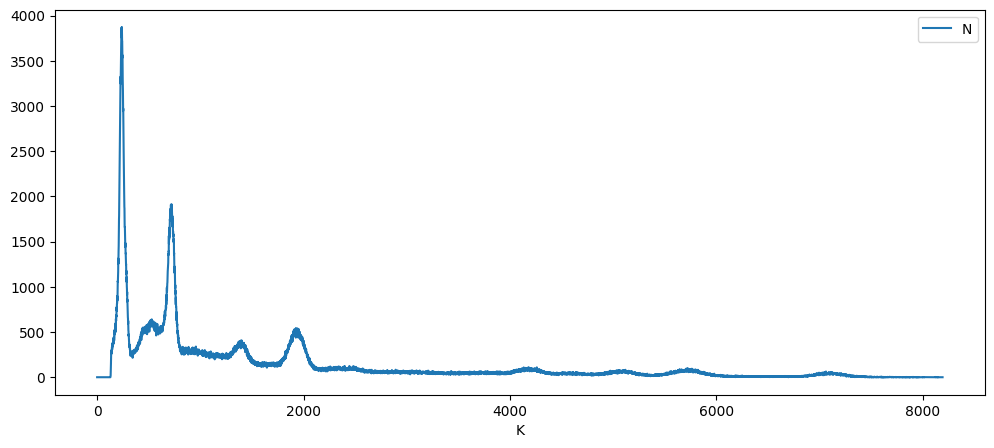

In [2]:
data.plot("K", "N", figsize=(12, 5)); # type: ignore

Wir erkennen hohe Peaks im Bereich $K < 2100$ und ein paar flache Peaks bei $K > 4000$. Zur Einfachheit werden hier auschließlich die hohen Peaks ausgewertet. Zudem ist zu erkennen, dass es für sehr kleine Kanalnummern ($K < 140$) keine Daten aufgenommen wurden. Diese Werte können bei der Auswertung ebenfalls weggelassen werden. Wie filtern wir nun unsere Daten, sodass nur noch die gewünschten Datenpunkte enthalten sind?

## Teil 2: Umgang mit DataFrames und Arrays

### DataFrames

Wie können wir nun auf die Daten im eingelesenen DataFrame zugreifen? Meist möchten wir eine bestimmte Spalte aus der Tabelle weiterverarbeiten. Um beispielsweise auf die Teilchenzahlen $N$ als Numpy-Array zuzugreifen können wir schreiben:

In [3]:
data['N'].to_numpy()

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Hier passiert folgendes: `data['N']` gibt die Spalte mit Name "N" als `Series`-Objekt zurück. Da es in der Regel einfacher ist, stets einheitlich mit Numpy-Arrays zu arbeiten, wird die `Series` mit der `to_numpy()`-Methode in ein solches umgewandelt. Um das gesamte DataFrame in ein zweidimensionales Numpy-Array umzuwandeln, schreibt man:

In [4]:
data.to_numpy()

array([[   0,    0],
       [   1,    0],
       [   2,    0],
       ...,
       [8189,    0],
       [8190,    0],
       [8191,    0]], dtype=int64)

Transponiert man nun dieses Array, so entsprechen die Zeilen den Spalten und umgekehrt. Dies kann dazu genutzt werden, um die Spalten in Variablen zu "entpacken":

In [5]:
K, N = data.to_numpy().T

### Zugriff auf Array-Elemente

Auf einzelne Werte eines Arrays kann man wie folgt zugreifen:

In [6]:
# Element mit Index 420
N[420]

432

In [7]:
# Erstes Element
N[0]

0

In [8]:
# Letztes Element
N[-1]

0

In [9]:
# Drittletztes Element
N[-3]

0

### Zugriff auf Teilbereiche eines Arrays

Auf Teil-Arrays kann mit dem sogenanntem "Slicing" zugegriffen werden:

In [10]:
# Element 500 bis (aber ohne) Element 510
N[500:510]

array([573, 580, 552, 598, 573, 611, 505, 600, 556, 604], dtype=int64)

In [11]:
# Erstes Element bis (aber ohne) Element 10
N[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [12]:
# Zehntletztes bis (inklusive) letztes Element
N[-10:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [13]:
# Jedes zweite Element
N[::2]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Zugriff auf Elemente, die bestimmte Bedingungen erfüllen

In [14]:
# Alle Elemente, die größer als 3000 sind
N[N > 3700]

array([3707, 3805, 3797, 3757, 3871, 3782, 3869, 3727, 3716, 3716],
      dtype=int64)

In [15]:
# Alle Elemente, die zwischen 2700 und 3000 liegen
N[(N > 2700) & (N < 3000)]

array([2761, 2811, 2923, 2947, 2943, 2972, 2822], dtype=int64)

> **Achtung:** Hier kann leider nicht die Notation `2000 < N < 3000` verwendet werden, wie es bei einzelnen Werten möglich ist. TODO: Erklärung? Oder zu tiefgehend?

In [16]:
# Alle Kanalnummern, bei denen die Teilchenzahl größer als 3700 ist
K[N > 3700]

array([234, 235, 236, 237, 238, 239, 240, 241, 242, 243], dtype=int64)

Auch DataFrames können auf diese Weise gefiltert werden:

In [17]:
data[data['N'] > 3700]

,K,N
234,234,3707
235,235,3805
236,236,3797
237,237,3757
238,238,3871
239,239,3782
240,240,3869
241,241,3727
242,242,3716
243,243,3716


### Beispiel: Energiekalibration
Wie zuvor bereits angesprochen, möchten wir ausschließlich die hohen Peaks des Spektrums bei $K < 2100$ auswerten. Dazu filtern wir unsere Arrays wir folgt:

In [18]:
N = N[(K > 140) & (K < 2100)]
K = K[(K > 140) & (K < 2100)]

> **Vorsicht:** Hier ist es wichtig, dass wir erst `N` und danach `K` filtern. Würden wir erst `K` filtern, so hätte `K` danach eine andere Länge als `N` und könnte nicht mehr als Mask verwendet werden. Alternativ könnte man auch zunächst eine Variable `mask = (K > 140) & (K < 2100)` definieren und dann mit `K[mask]` und `N[mask]` filtern.

Alternativ hätten wir auch vor der Erstellung der Array das DataFrame filtern können:

In [19]:
data = data[(data['K'] > 140) & (data['K'] < 2100)]

### Teil 3: Rechnen mit Arrays
Im Modul `numpy` sind viele mathematische Funktionen zum Rechnen mit Arrays enthalten. Am wichtigsten sind wahrscheinlich die arithmetischen Operationen `+`, `-`, `*`, `/`, `**`, welche jeweils elementweise auf das Array angewendet werden. Im folgenden einige Beispiele:

In [20]:
# Addiere 42 auf jedes Element
N + 42

array([303, 350, 369, ..., 134, 149, 131], dtype=int64)

In [21]:
# Multipliziere jedes Element mit 2
N * 2

array([522, 616, 654, ..., 184, 214, 178], dtype=int64)

In [22]:
# Multipliziere jedes Element von N mit dem entsprechenden Element von K
N * K

array([ 36801,  43736,  46761, ..., 192924, 224486, 186811], dtype=int64)

In [23]:
import numpy as np

# Wende die Sinus-Funktion auf jedes Element an
np.sin(N)

array([-0.24528121,  0.12360304,  0.27093481, ..., -0.77946607,
        0.18478174,  0.86006941])

TODO: Weitere wichtige Dinge?

### Teil 4: Visualisierung von Daten

#### Einfache Plots
Zur Visualisierung der Daten bietet sich das Paket `matplotlib` an. Dieses wird üblicherweise wie folgt importiert:

In [24]:
import matplotlib.pylab as plt

In Matplotlib arbeitet man mit folgenden Objekten:

- `Figure`: Repräsentiert die gesamte "Zeichnung" des Plots
- `Axes`: Repräsentiert eine Gruppe von Achsen (typischerweise x- und y-Achse). Ein `Axes`-Objekt kann auch als Graph interpretiert werden.

Eine Figure mit einem Graphen kann man mit `plt.subplots()` erstellen. Auf den Graphen kann man dann mit verschiedenen Funktionen zeichnen. Die wichtigste Funktion ist die `plot`-Funktion, welche wie folgt verwendet wird:

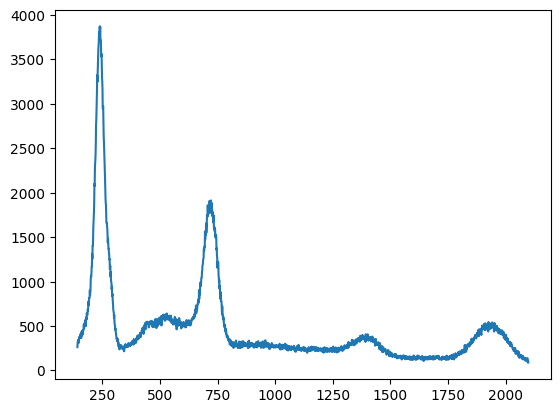

In [25]:
fig, ax = plt.subplots()
ax.plot(K, N);

> **Hinweis:** Wenn bei euch in der Ausgabe etwas wie zum Beispiel `[<matplotlib.lines.Line2D at ...>]` steht, dann liegt das lediglich daran, dass Jupyter-Notebooks stets den Wert der letzten Zeile ausgeben, welches in dem Fall ein `matplotlib`-Objekt ist. Entweder könnt ihr dies ignorieren oder die Ausgabe mit einem Semikolon am Ende der letzten Zeile unterdrücken. 

Bevor jetzt jemand fragt, auf welcher Achse Äpfel und auf welcher Birnen aufgetragen sind, fügen wir lieber schnell noch Achsenbeschriftungen hinzu:

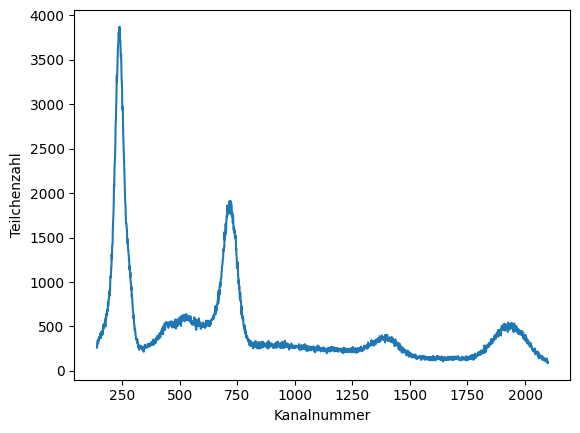

In [26]:
fig, ax = plt.subplots()
ax.plot(K, N)
ax.set_xlabel('Kanalnummer')
ax.set_ylabel('Teilchenzahl');

Gibt man keine weiteren Argumente an, so verbindet die plot-Funktion die Datenpunkte mit Linien.
Bei gemessenen Daten ist es meist jedoch sinnvoller, ausschließlich die Punkte einzuzeichnen. Um dies zu erreichen, kann der plot-Funktion ein String als drittes Argument übergeben werden, welches das Punkt- bzw. Linienformat angibt. Die möglichen Formate sind [hier](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) im Abschnitt "Format Strings" beschrieben.
Um schwarze Punkte ohne Verbindungslinien zu plotten, kann das Format `".k"` verwendet werden, wobei `.` das Punktformat und `k` die Farbe Schwarz spezifiziert. Da wir hier eine große Menge an Datenpunkten haben, macht es sinn die Größe der Plotpunkte zu verringern. Dies geschieht mit dem Argument `ms` (oder `markersize`).

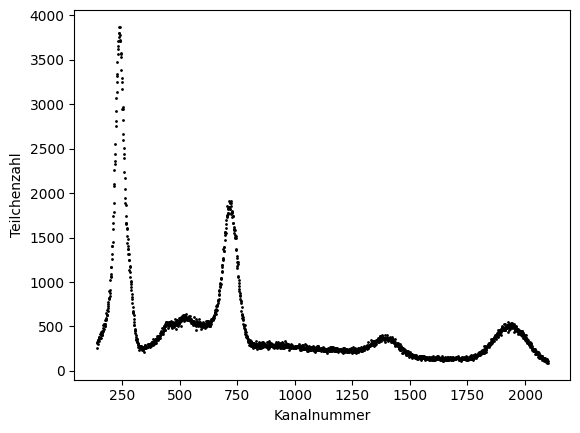

In [31]:
fig, ax = plt.subplots()
ax.plot(K, N, ".k", ms=2) # <-- kleine schwarze Punkte
ax.set_xlabel('Kanalnummer')
ax.set_ylabel('Teilchenzahl');

#### Plot-Styles
Da der Standardstil der Matplotlib-Plots nicht unbedingt ansprechend ist, ist es sinnvoll diesen Stil anzupassen. Dies ist mit der Variable `plt.rcParams` möglich, welches die Konfiguration